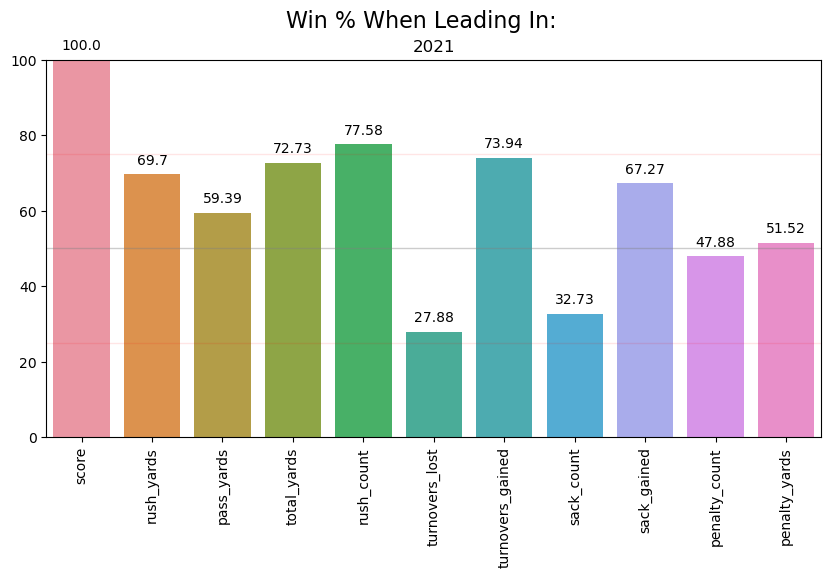

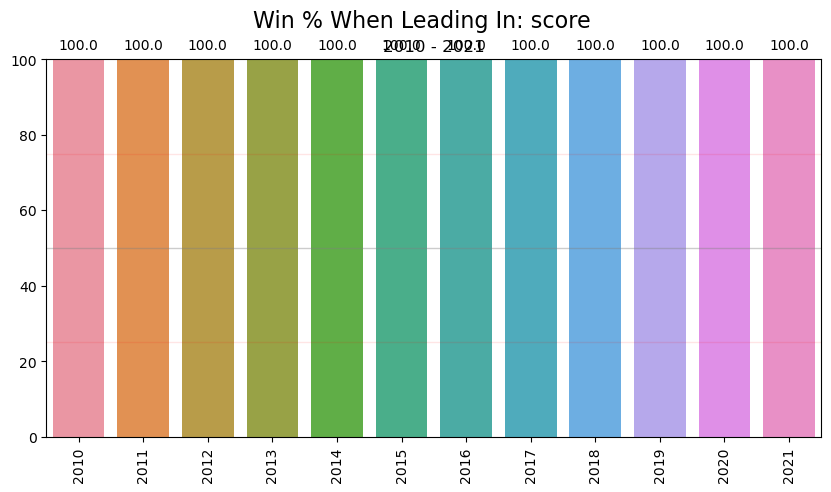

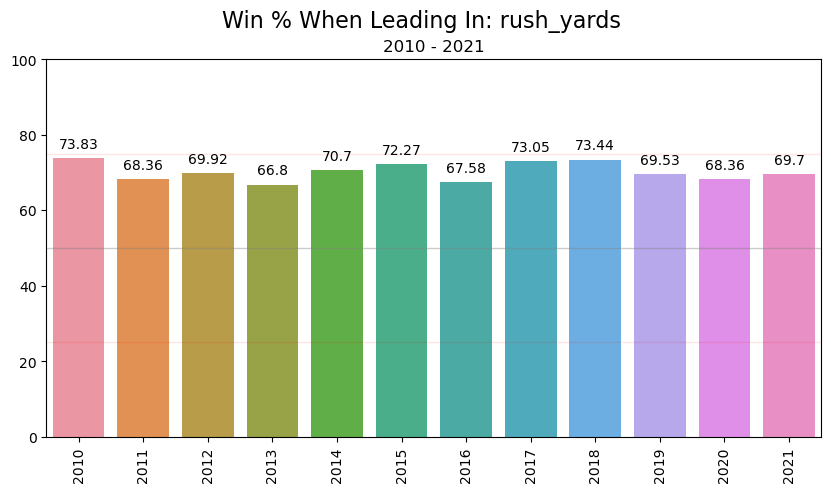

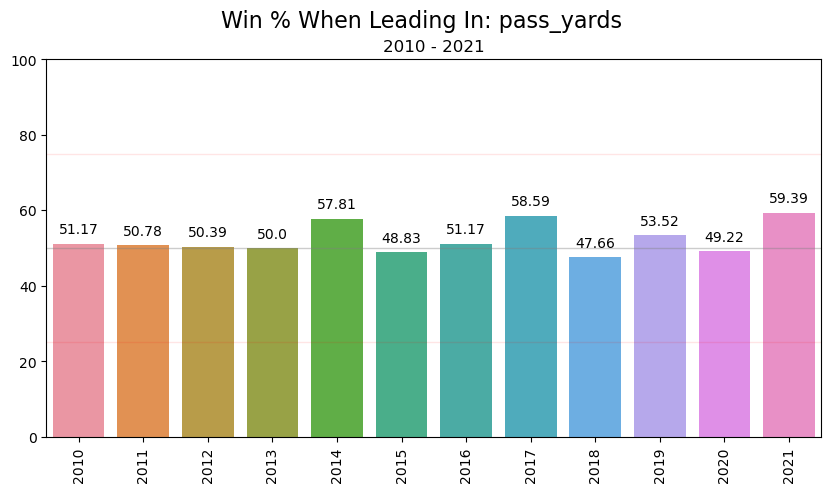

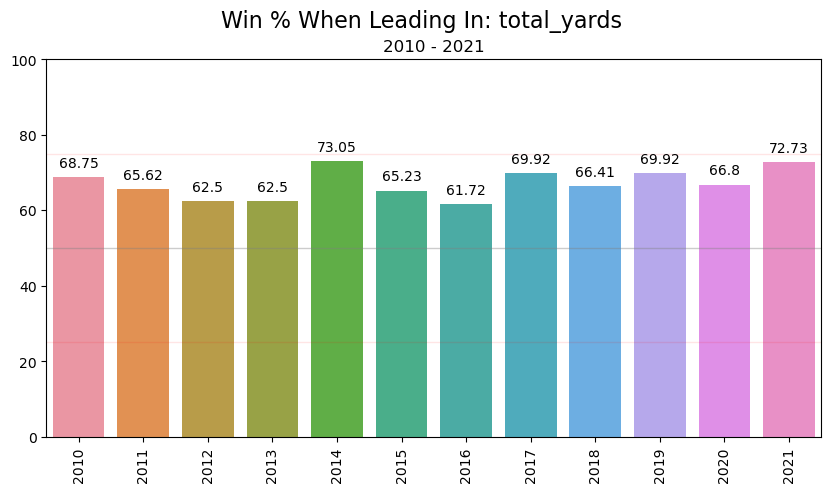

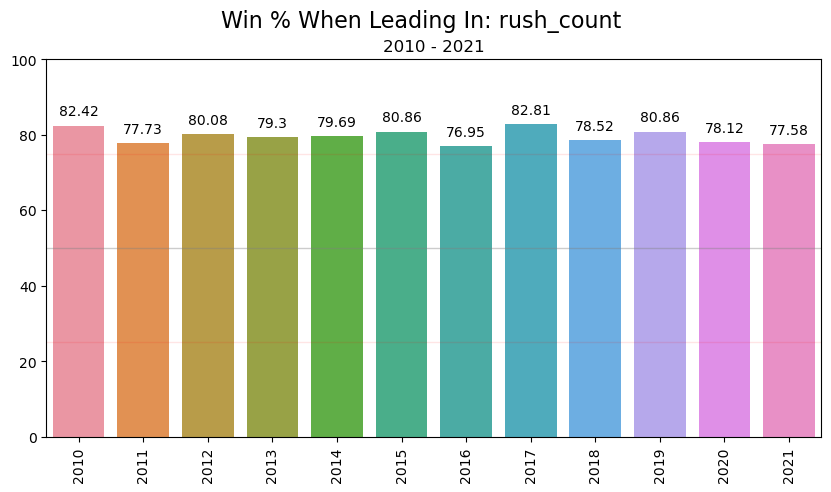

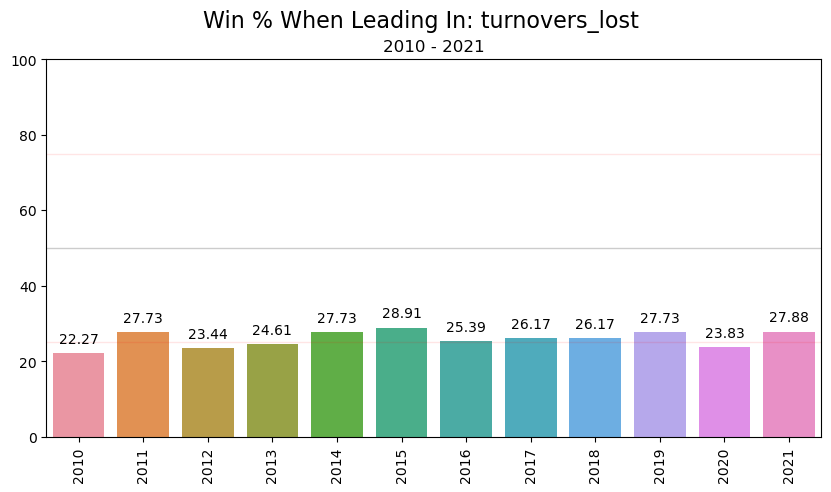

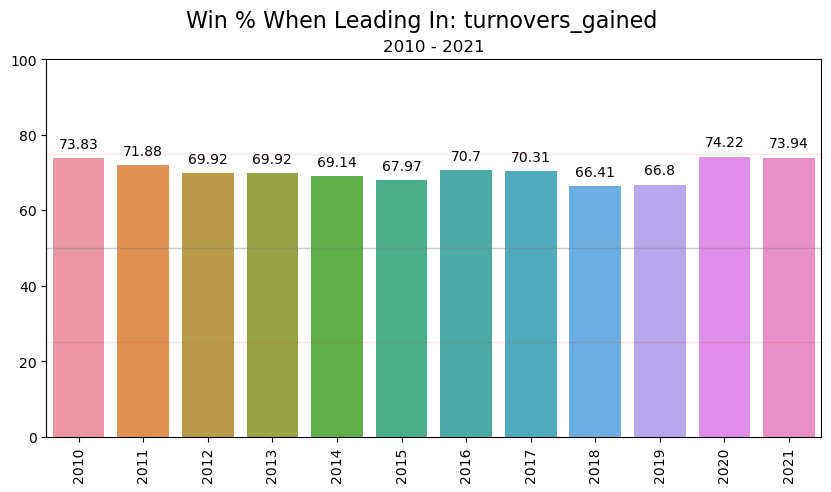

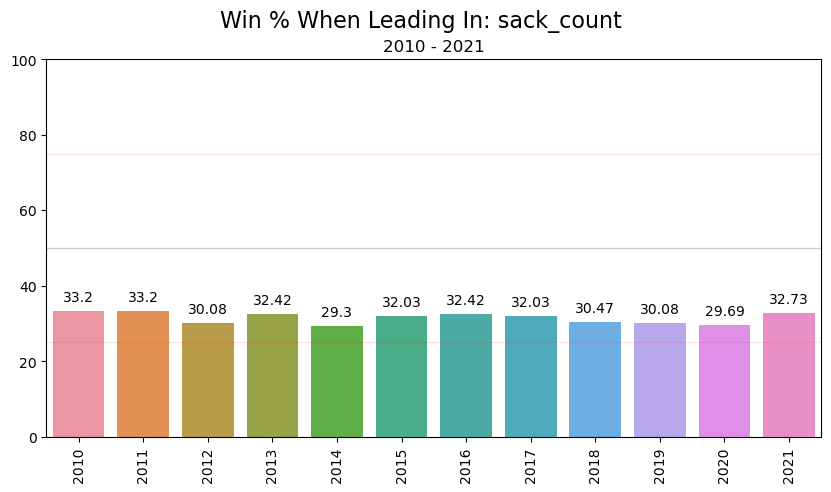

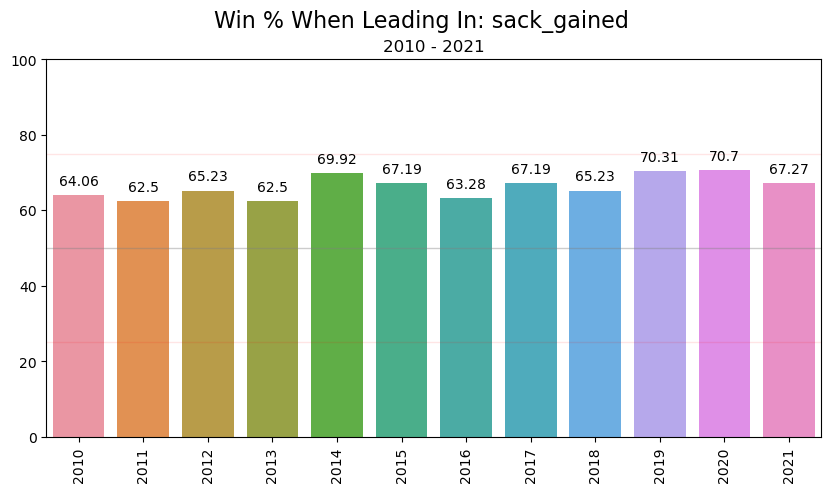

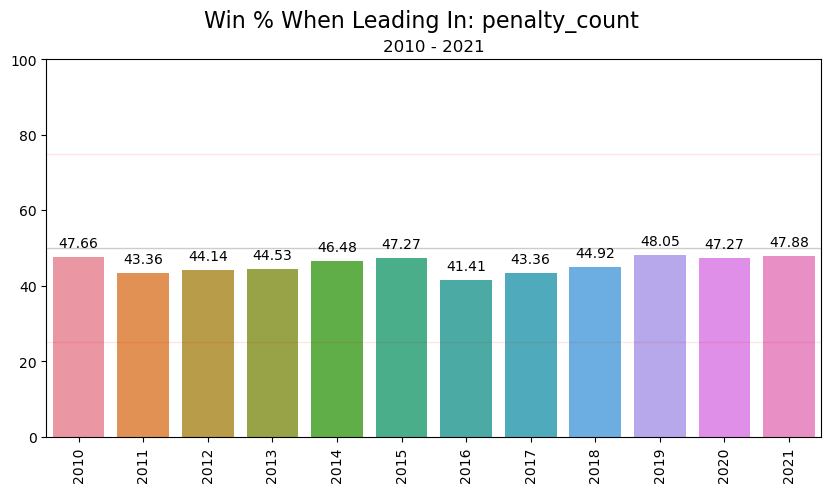

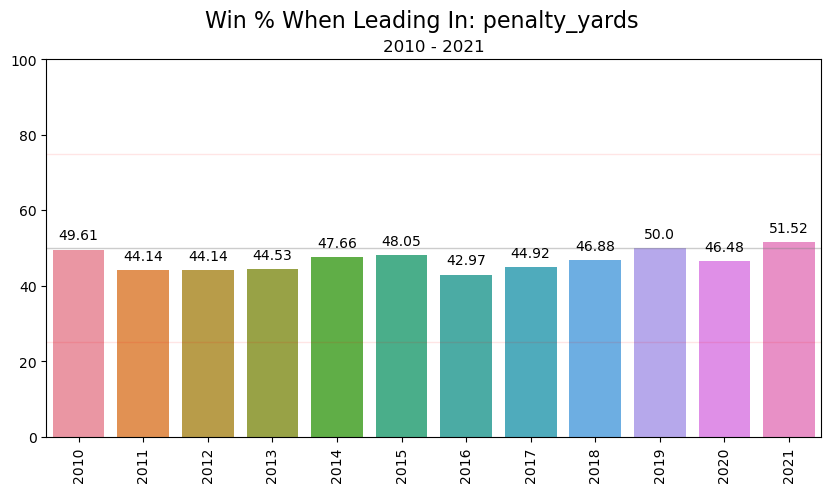

In [26]:
import utils.game_utils as gu
import utils.plot as guplot

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

nfld = gu.NFL_Data()

def get_perc_winning_team_lead_field(df, field):
  '''
  Given a df and a field, return the percentage of times the 
  winning team lead in that field.
  
  If there is a '!' in the field name the invert the 
  logic
  '''
  if field.startswith('!'):
    field = field.replace('!','')
    wins_df = df[
        ((df['win'] == 1) & (df[f'team_{field}'] <= df[f'opponent_{field}']))|
        ((df['win'] == 0) & (df[f'team_{field}'] > df[f'opponent_{field}']))
      ]
  else:
    wins_df = df[
        ((df['win'] == 1) & (df[f'team_{field}'] > df[f'opponent_{field}']))|
        ((df['win'] == 0) & (df[f'team_{field}'] <= df[f'opponent_{field}']))
      ]

  return (len(wins_df) / len(df)) * 100

def work_fields_by_year(df, fields):
  for field in fields:
    data = {}
    
    for year in df['year'].unique():
      data[year] = get_perc_winning_team_lead_field(df[df['year'] == year], field)

    for item in data: data[item] = [data[item]]
    
    min_year = df['year'].min()
    max_year = df['year'].max()
  
    if min_year == max_year:
      title = f'{min_year}'
    else:
      title = f'{min_year} - {max_year}'
    suptitle = f'Win % When Leading In: {field}'
    
    pdf = pd.DataFrame(data)
    guplot.bar_percent_plot(pdf, suptitle=suptitle, title=title)

def work_fields(df, fields):
  data = {}
  for field in fields:
    data[field] = get_perc_winning_team_lead_field(df, field)

  for item in data: data[item] = [data[item]]
  
  min_year = df['year'].min()
  max_year = df['year'].max()
  
  if min_year == max_year:
    title = f'{min_year}'
  else:
    title = f'{min_year} - {max_year}'
    
  suptitle = 'Win % When Leading In:'
  
  pdf = pd.DataFrame(data)
  guplot.bar_percent_plot(pdf, suptitle=suptitle, title=title)

### CREATE ALL VIZ
fields = [
    'score',
    'rush_yards',
    'pass_yards', 
    'total_yards', 
    'rush_count',
    'turnovers_lost',
    'turnovers_gained',
    'sack_count',
    'sack_gained',
    'penalty_count',
    'penalty_yards',
  ]
games_df = nfld.data_by_game()
work_fields(gu.get_year(games_df, 2021), fields)
work_fields_by_year(games_df, fields)